In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import softmax

In [2]:
test = np.array(pd.read_csv('./fashion-mnist_test.csv'))
train = np.array(pd.read_csv('./fashion-mnist_train.csv'))
# shuffle the dataset
np.random.seed(42)
np.random.shuffle(train)
np.random.shuffle(test)
X_train = train[:10000,1:]
y_train = train[:10000,0]
X_test = test[:5000,1:]
y_test = test[:5000,0]
X_train_reshape = X_train.reshape(10000, 28, 28, 1)
X_test_reshape = X_test.reshape(5000, 28, 28, 1)

## Let's perform some data visualization on the image

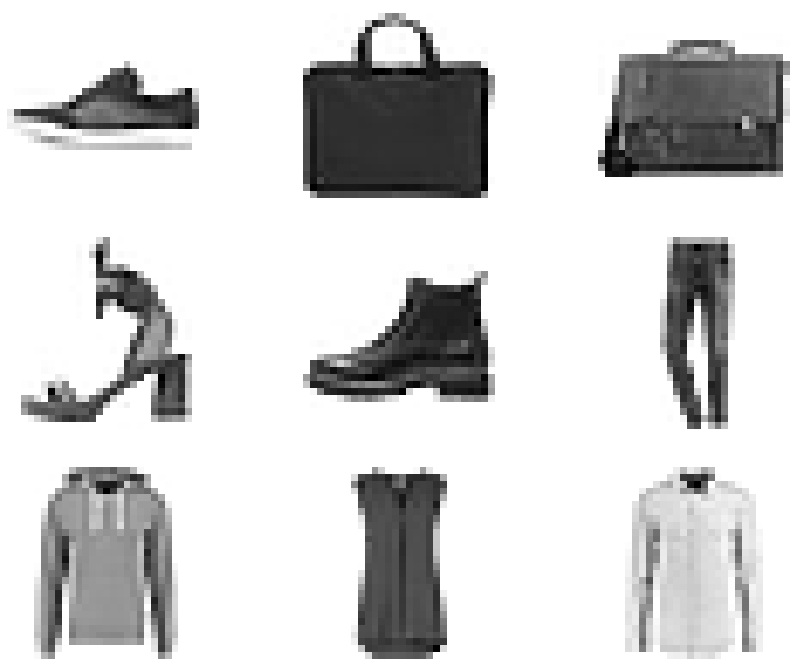

In [3]:
fig = plt.figure(figsize=(15,12))
ax1 = plt.subplot(331)
plt.imshow( X_train_reshape[0], cmap="binary")
plt.axis("off")
ax2 = plt.subplot(332)
plt.imshow( X_train_reshape[1], cmap="binary")
plt.axis("off")
ax3 = plt.subplot(333)
plt.imshow( X_train_reshape[2], cmap="binary")
plt.axis("off")
ax1 = plt.subplot(334)
plt.imshow( X_train_reshape[3], cmap="binary")
plt.axis("off")
ax2 = plt.subplot(335)
plt.imshow( X_train_reshape[4], cmap="binary")
plt.axis("off")
ax3 = plt.subplot(336)
plt.imshow( X_train_reshape[5], cmap="binary")
plt.axis("off")
ax1 = plt.subplot(337)
plt.imshow( X_train_reshape[6], cmap="binary")
plt.axis("off")
ax2 = plt.subplot(338)
plt.imshow( X_train_reshape[7], cmap="binary")
plt.axis("off")
ax3 = plt.subplot(339)
plt.imshow( X_train_reshape[8], cmap="binary")
plt.axis("off")
plt.show()

In [4]:
def augment_by_one(data):
    data = np.copy(data)
    ones = np.ones(data.shape[0]).reshape(-1,1)
    augmented_data = np.hstack((ones,data))
    return augmented_data
def one_hot_encoding(data):
    num_count = set()
    for i in data:
        num_count.add(i)
    data = np.copy(data)
    zeros = np.zeros((data.shape[0],len(num_count)))
    for i in range(data.shape[0]):
        zeros[i,data[i]] = 1
    return zeros

In [5]:
X_train = augment_by_one(X_train)
X_test = augment_by_one(X_test)
y_train = one_hot_encoding(y_train)

In [6]:
def multi_class_logistic_regression(eps,lr,max_iter,X,y,print_iter):
    weights_prev = np.zeros((y.shape[1],X.shape[1]))
    weights_next = np.copy(weights_prev)
    l1_norm = np.Inf
    t = 0
    index = [i for i in range(X.shape[0])]
    while l1_norm > eps and t<max_iter: 
        np.random.shuffle(index)
        for k_index in index:
            pi = softmax(np.dot(weights_next,X[k_index]))
            for i in range(y.shape[1]-1):
                grad = (y[k_index][i] - pi[i])*X[k_index]
                weights_next[i] = weights_next[i]+lr*grad
        t += 1
        l1_norm = np.linalg.norm((weights_next - weights_prev))
        if t%print_iter ==0:
            print(f'iteration {t} with weight difference {l1_norm}')
        weights_prev = np.copy(weights_next)
    return weights_next

In [7]:
def prediction(weight,X,y):
    y_pred = np.zeros(y.shape)
    for i in range(X.shape[0]):
        y_pred[i] = np.argmax(softmax(weight@X[i]))
    return y_pred

In [8]:
def F1_Score(y_pred,y_test,classes):
    F1 = list()
    for i in range(classes):
        gt_masks = y_test == i
        pred_masks = y_pred == i
        correct = np.logical_and(gt_masks,pred_masks) == True
        precision = np.sum(correct)/np.sum(pred_masks)
        recall = np.sum(correct)/np.sum(gt_masks)
        F1.append((2*precision*recall)/(precision+recall)) 
    return np.mean(F1)

In [9]:
weight = multi_class_logistic_regression(1e-4,2.5e-9,200,X_train,y_train,40)
y_pred = prediction(weight,X_test,y_test)
F1 = F1_Score(y_pred,y_test,y_train.shape[1])
Accuracy = np.sum(y_pred == y_test)/y_test.shape[0]

iteration 40 with weight difference 0.00025676152009283923
iteration 80 with weight difference 0.0001592500233945391
iteration 120 with weight difference 0.00018629358909356272
iteration 160 with weight difference 0.00013467900458949633
iteration 200 with weight difference 9.628960334741844e-05


In [10]:
print('The weight matrix is:')
print(weight)
print(f'The accuracy is {Accuracy} and the F1 score is {F1}')

The weight matrix is:
[[ 5.36970421e-06 -3.91100622e-07 -1.79989214e-06 ... -1.46217371e-04
  -9.34297122e-05 -1.05904580e-05]
 [-7.17555636e-06 -3.86626333e-09 -2.18885860e-07 ... -3.41759438e-05
  -8.35540338e-06 -2.79971370e-06]
 [-3.47669859e-06 -5.66004537e-08  2.39182854e-06 ...  4.01655193e-04
   1.45178021e-04  2.12632391e-06]
 ...
 [-3.51465160e-06 -1.43833666e-09 -2.47382550e-08 ... -2.26587628e-05
  -9.47119983e-06 -2.99654396e-06]
 [-1.55212742e-05 -1.15712662e-06 -1.40042116e-07 ... -2.08252726e-04
  -1.56464718e-04 -1.85142862e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
The accuracy is 0.8322 and the F1 score is 0.8298095391967444
